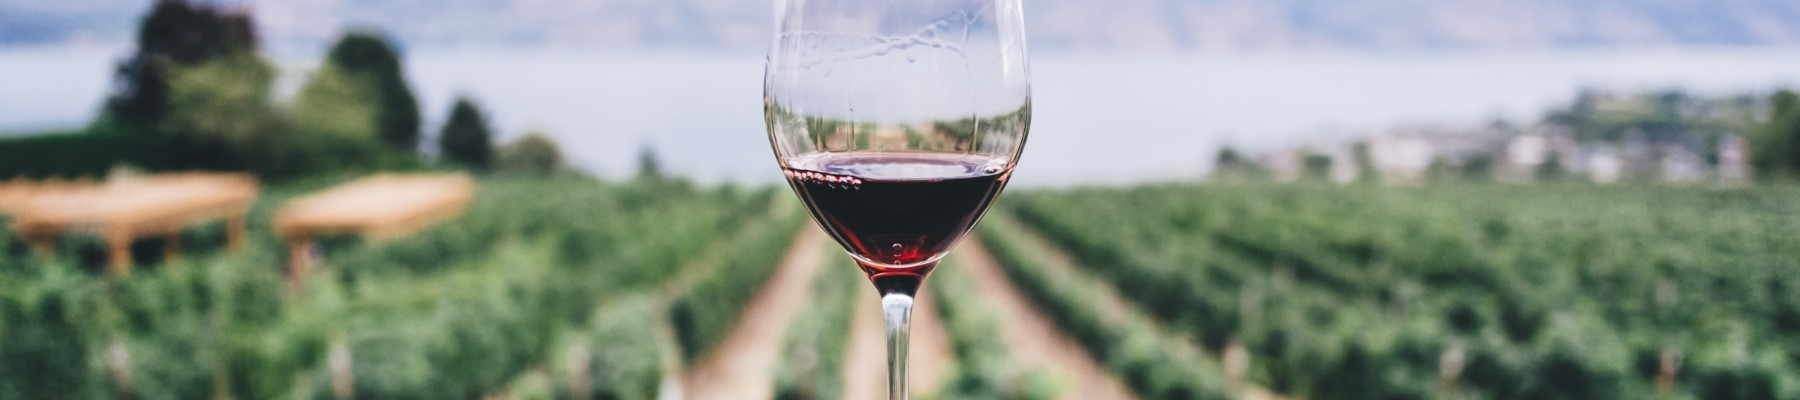

### Imports

In [93]:
#Imports and load the data csv.
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, plot_confusion_matrix, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, RandomForestClassifier

### Load The Data

In [94]:
df = pd.read_csv('D:\winequality-red.csv')

In [95]:
#Data frame first five rows
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [96]:
#Data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Checking the data

In [97]:
#Checking if have some null values for preparing the data
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The Data is clean already :) !!

In [98]:
#Checking how many rows and columns we have.
df.shape

(1599, 12)

### Explanation of the relevant features

* fixed acidity - are non-volatile acids that do not evaporate readily
* volatile acidity - measure of the wine's volatile acids.
* citric acid - measure of the wine's weak organic acids.
* residual sugar - measure of the wine's natural grape sugars leftover in a wine after the alcoholic fermentation finishes.
* chlorides - measure the wine's amount of salt.
* free sulfur dioxide -  it prevents microbial growth and the oxidation of wine.
* total sulfur dioxide - is the amount of free and bound forms of SO2.
* density - measure the wine's density.
* pH - measure the wine's total acids.
* sulphates - measure the wine's food preservatives.
* alcohol - measure the wine's precentge alcohol.
* quality - quality score between [0 - 10] , (0 = bad , 10 = best).

In [99]:
#Explore the Data, Take a snap of the all information std, mean and 25-50-70 by the features.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


we can see that transpose Reflect the DataFrame over its main diagonal by writing rows as columns and vice-versa.

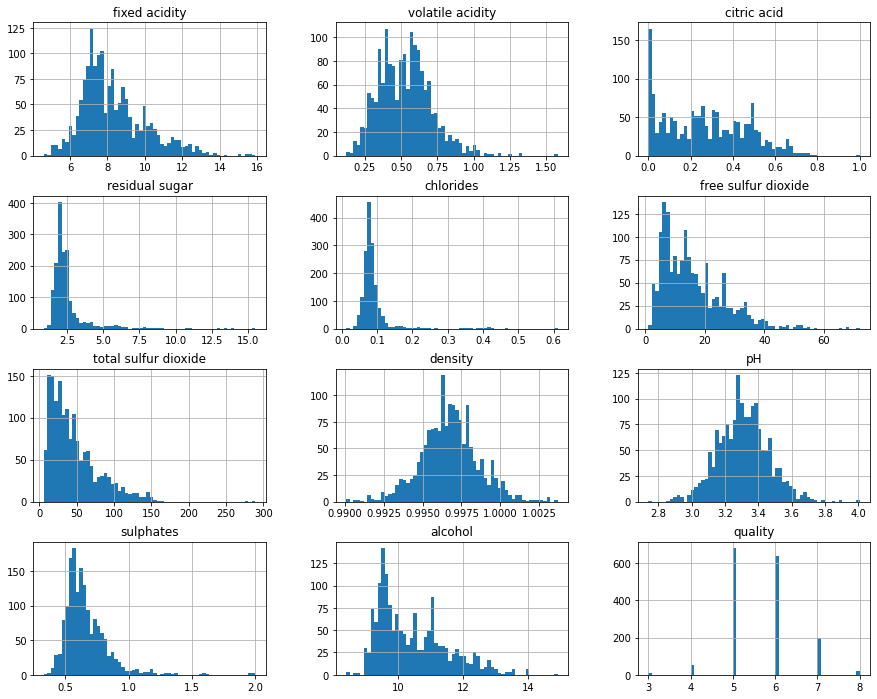

In [100]:
df.hist(bins=60, figsize=(15,12));

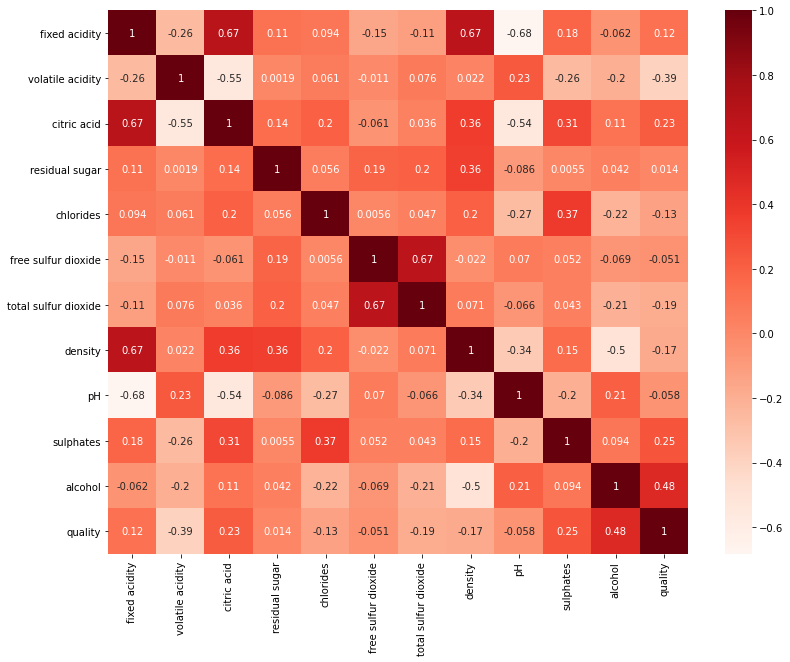

In [101]:
#checking the relationship between all the features with the Quality
plt.subplots(figsize=(13,10));
sn.heatmap(df.corr(), annot=True, cmap='Reds');

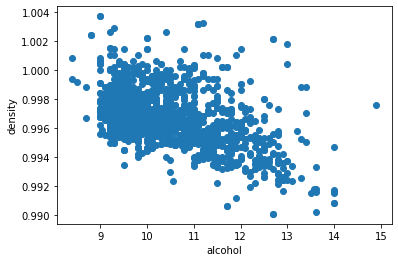

In [102]:
plt.scatter(df["alcohol"],df["density"])
plt.xlabel("alcohol")
plt.ylabel("density")
plt.show()

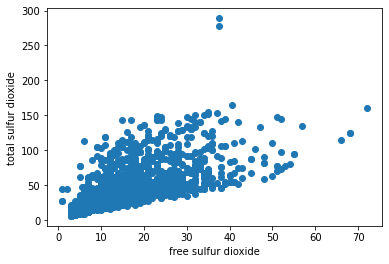

In [103]:
plt.scatter(df["free sulfur dioxide"],df["total sulfur dioxide"])
plt.xlabel("free sulfur dioxide")
plt.ylabel("total sulfur dioxide")
plt.show()

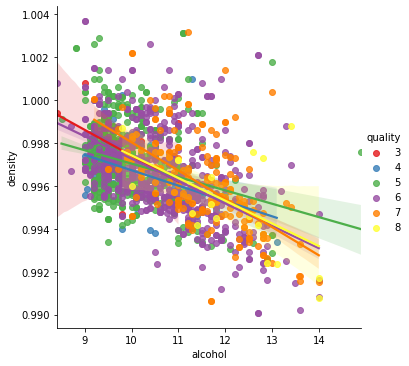

In [104]:
sn.lmplot(x = 'alcohol', y = 'density', data=df, hue='quality', palette='Set1');

### Split the data to train and test 

In [105]:
y = df['quality']
X = df.drop(['quality'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)


#Data training set
print('Train data: ', len(X_train)/len(X))

#test data
print('Test data: ', X_test.shape[0]/X.shape[0])

Train data:  0.7498436522826767
Test data:  0.2501563477173233


In [106]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1199, 11) (400, 11) (1199,) (400,)


### Dummy Regressor

In [107]:
dm = DummyRegressor(strategy="mean")
dm.fit(X_train, y_train)

print("Mean Squared Error of dummy: {}".format(metrics.mean_squared_error(y_test,dm.predict(X_test), squared=False)))

Mean Squared Error of dummy: 0.787299557861373


### Function helper of evalute model with X_test and y_test 

In [108]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    errors = abs(predictions - y_test)
    mape = 100 * np.mean(errors / y_test)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy

### Model 1 - Linear Regression

In [109]:
#Creating and Training the Model
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

print('Training data Accuracy:', LR.score(X_train, y_train))
print('Test data Accuracy:', LR.score(X_test, y_test))
print('Root mean Square Deviation:', mean_squared_error(y_test, y_pred))
print('Intercept', LR.intercept_)

#Interpreting the coefficients
pd.DataFrame(data=LR.coef_, index=X_train.columns, columns=['Coefficients'])

Training data Accuracy: 0.35485287452056624
Test data Accuracy: 0.37228312008181064
Root mean Square Deviation: 0.38830173868689244
Intercept 20.028917356883547


,Coefficients
fixed acidity,0.021860
volatile acidity,-1.008695
citric acid,-0.133904
residual sugar,0.008859
chlorides,-1.755578
free sulfur dioxide,0.005009
total sulfur dioxide,-0.003654
density,-16.223648
pH,-0.343940
sulphates,0.819819


c:\users\koazg\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Predictions')

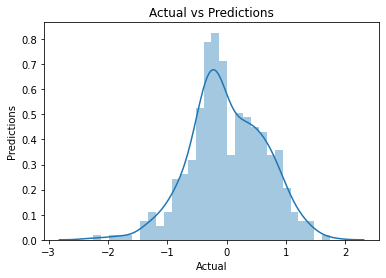

In [110]:
sn.distplot((y_test-y_pred),bins=30)
plt.title('Actual vs Predictions')
plt.xlabel('Actual')
plt.ylabel('Predictions')

In [111]:
DTC = DecisionTreeClassifier(max_depth=10)
# Fit the training data
DTC.fit(X_train, y_train)
# Predict based on test data
y_preds = DTC.predict(X_test)
print('Training data Accuracy:', DTC.score(X_train, y_train))
print('Test data Accuracy:', DTC.score(X_test, y_test))
print('Root mean Square Deviation:', mean_squared_error(y_test, y_preds))

Training data Accuracy: 0.9049207673060884
Test data Accuracy: 0.6275
Root mean Square Deviation: 0.535


In [112]:
#Cross Val Score of Knn (showing 20)
cvs = cross_val_score(DTC, X, y, cv=20)
print(cvs)
cvs.mean()

c:\users\koazg\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


[0.425      0.475      0.525      0.55       0.5        0.4875
 0.5625     0.5375     0.425      0.5625     0.5        0.575
 0.5125     0.6        0.4625     0.475      0.4375     0.4375
 0.575      0.56962025]


0.5097310126582277

In [113]:
#RandomForestClassifier model
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
y_predict = RFC.predict(X_test)
print('RandomForestClassifier Accuracy is: {}'.format(RFC.score(X_test,y_test)))

RandomForestClassifier Accuracy is: 0.675


In [114]:
#Cross Val Score of RFC (showing 20)
cvs = cross_val_score(RFC, X, y, cv=20)
print(cvs)
cvs.mean()

c:\users\koazg\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 10 members, which is less than n_splits=20.
  warnings.warn(("The least populated class in y has only %d"


[0.5625     0.5        0.5625     0.625      0.5875     0.5125
 0.5625     0.5125     0.5125     0.6375     0.6125     0.65
 0.6        0.6125     0.5625     0.6125     0.6625     0.55
 0.5375     0.64556962]


0.5810284810126582

In [115]:
feature_imp = pd.Series(RFC.feature_importances_, index=df.columns[:11]).sort_values(ascending=False)
feature_imp

alcohol                 0.152078
total sulfur dioxide    0.105746
sulphates               0.105648
volatile acidity        0.101631
density                 0.092129
chlorides               0.081683
residual sugar          0.074949
fixed acidity           0.073463
citric acid             0.072981
pH                      0.071108
free sulfur dioxide     0.068583
dtype: float64

No handles with labels found to put in legend.


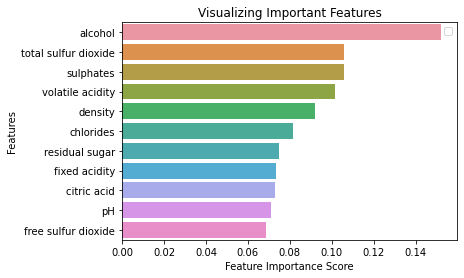

In [116]:
%matplotlib inline
sn.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Fine tuning with GridSearchCV 

In [117]:
#Grid Search with Cross Validation
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [8, 10, 12, 14],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [118]:
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


{'bootstrap': True,
 'max_depth': 14,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 300}

In [119]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

Model Performance
Average Error: 0.4437 degrees.
Accuracy = 91.93%.


### Evaluating Model Performance:
Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.

In [71]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.4998799122925445
MSE: 0.38830173868689244
RMSE: 0.6231386191586046
